In [0]:
import os
import numpy as np
import itertools
from itertools import combinations 
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt

import networkx as nx
import community
from networkx.algorithms import community as nx_com
from networkx.algorithms.cluster import clustering

import plotGraphs as plt_g
import read_egoNetwork as read_ego
import commdect_algos_eval as algorithms

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Retrive all 10 Ego Networks of snap facebook dataset and plot them

In [4]:
path = 'drive/My Drive/facebook/'
egoNodes = read_ego.read_edge_files(path)

Edge files of existing egonetworks:  ['348.edges', '686.edges', '698.edges', '107.edges', '0.edges', '414.edges', '3437.edges', '1684.edges', '3980.edges', '1912.edges'] 

nodes representing egonetworks:  [0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980]


ego network :  0
Name: 
Type: Graph
Number of nodes: 334
Number of edges: 2852
Average degree:  17.0778



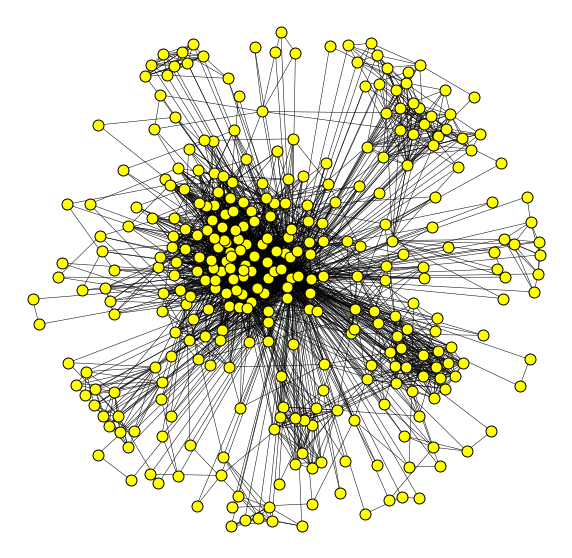

ego network :  107
Name: 
Type: Graph
Number of nodes: 1035
Number of edges: 27783
Average degree:  53.6870



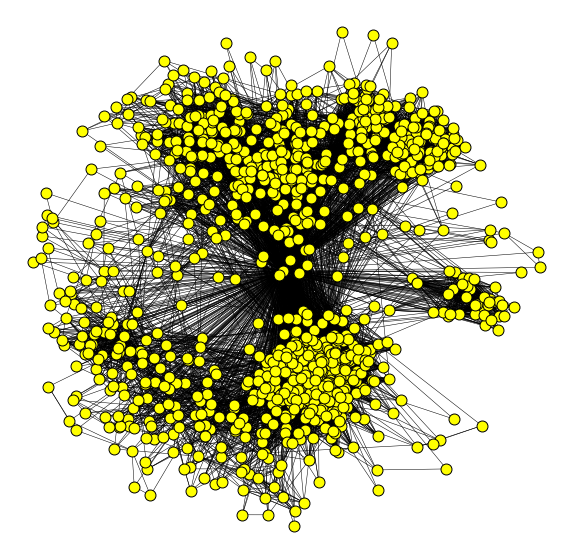

ego network :  348
Name: 
Type: Graph
Number of nodes: 225
Number of edges: 3416
Average degree:  30.3644



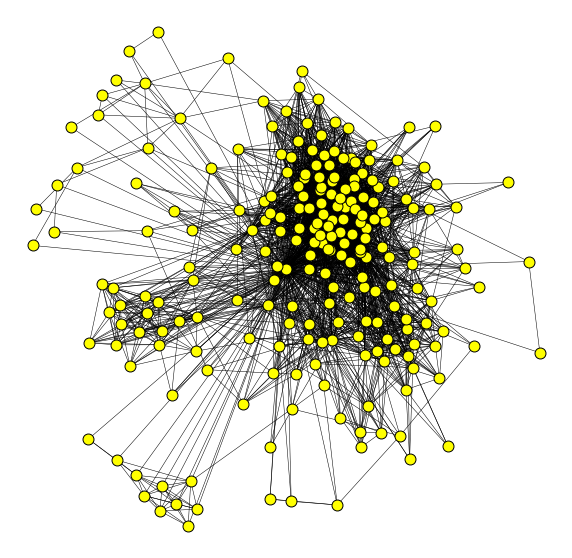

ego network :  414
Name: 
Type: Graph
Number of nodes: 151
Number of edges: 1843
Average degree:  24.4106



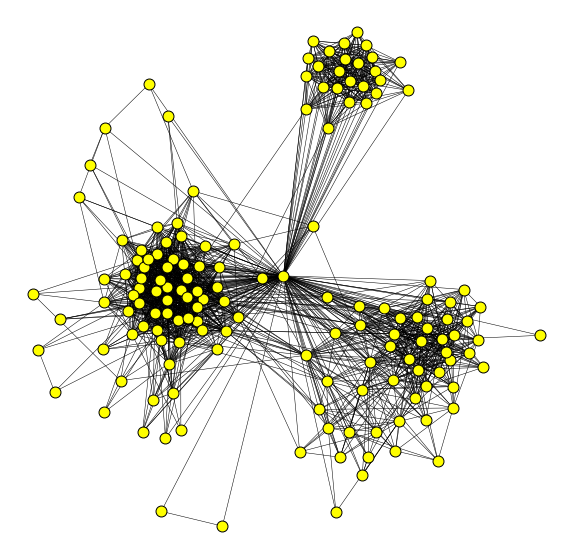

ego network :  686
Name: 
Type: Graph
Number of nodes: 169
Number of edges: 1824
Average degree:  21.5858



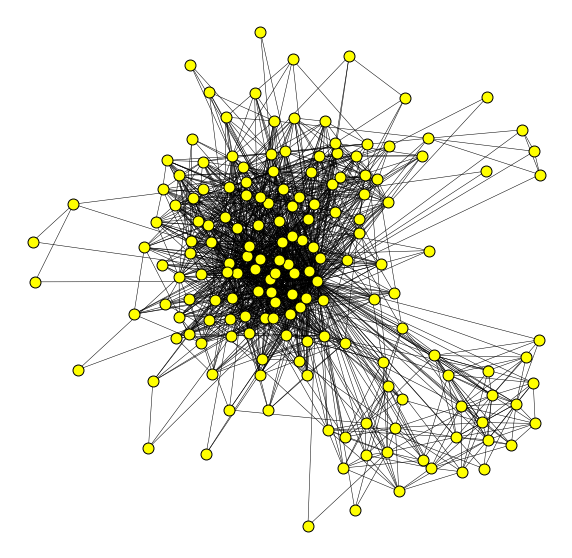

ego network :  698
Name: 
Type: Graph
Number of nodes: 62
Number of edges: 331
Average degree:  10.6774



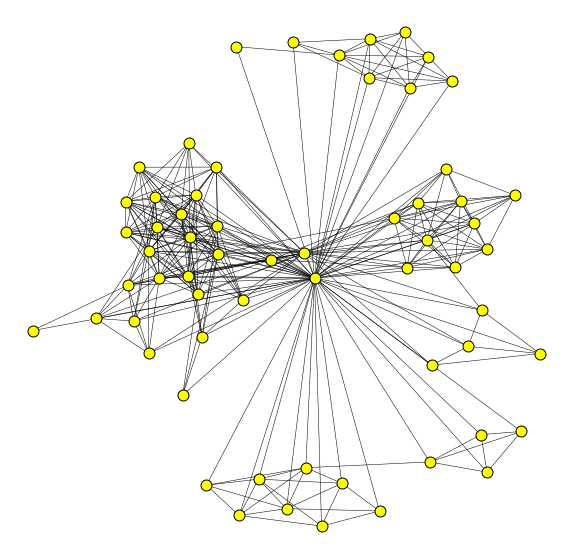

ego network :  1684
Name: 
Type: Graph
Number of nodes: 787
Number of edges: 14810
Average degree:  37.6366



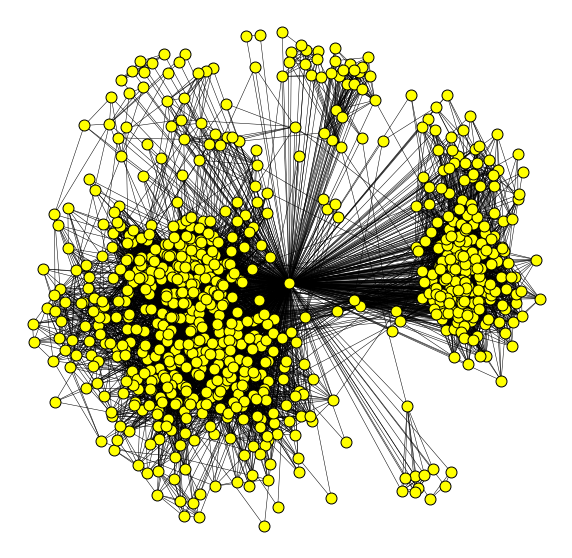

ego network :  1912
Name: 
Type: Graph
Number of nodes: 748
Number of edges: 30772
Average degree:  82.2781



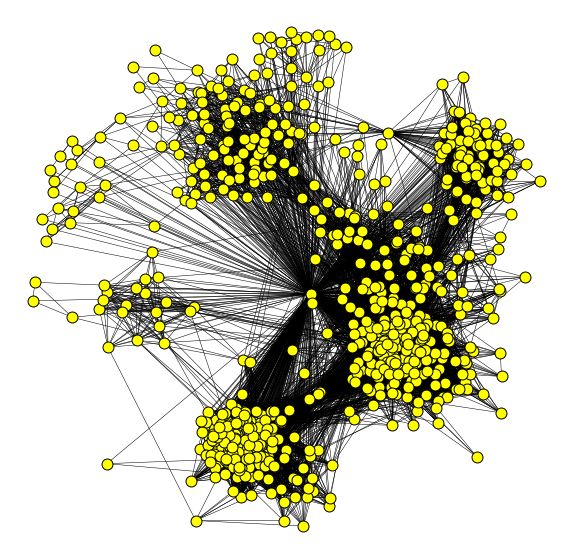

ego network :  3437
Name: 
Type: Graph
Number of nodes: 535
Number of edges: 5347
Average degree:  19.9888



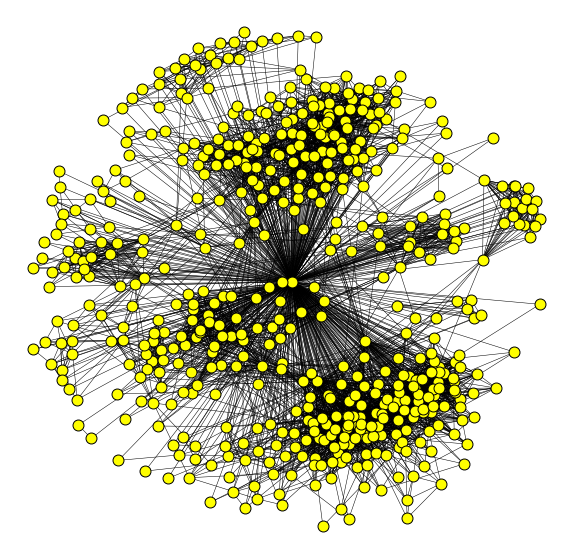

ego network :  3980
Name: 
Type: Graph
Number of nodes: 53
Number of edges: 198
Average degree:   7.4717



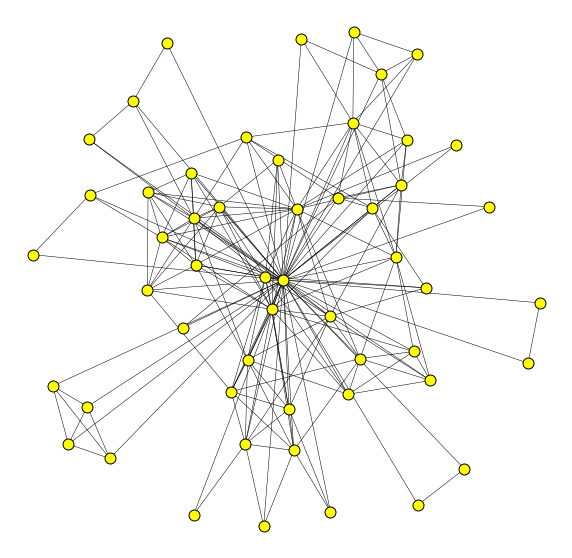

In [5]:
ego_graphs,total_edges = read_ego.create_graph(egoNodes,path)

Detect Communities of Each Ego Network

Community Detection using Girvan Newman

community count:  2


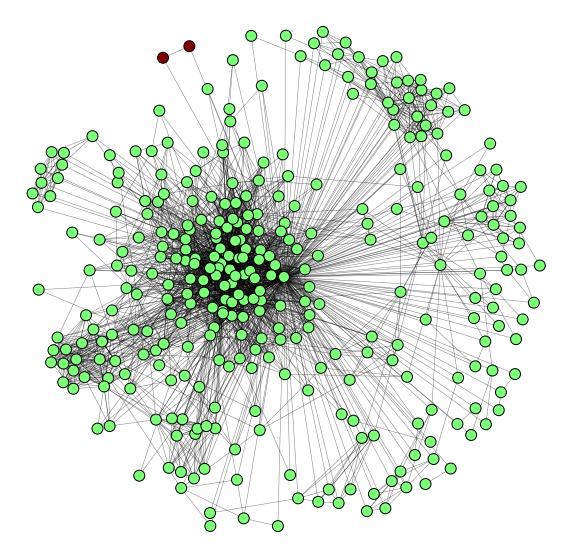

Modularity of community partitions:  0 
 0.0007002787345412706 

community count:  2


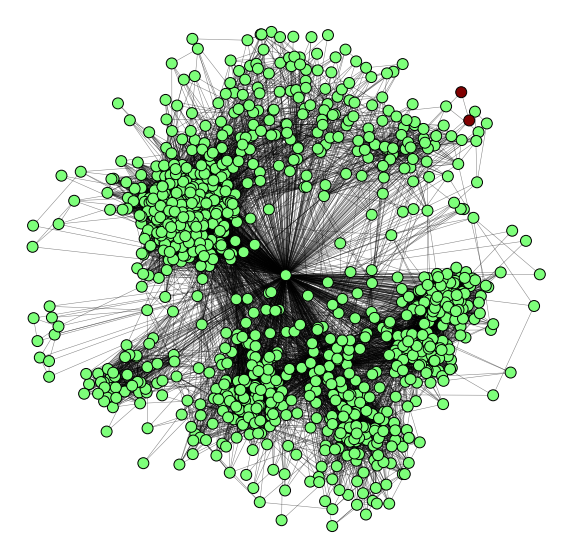

Modularity of community partitions:  1 
 7.197027263370163e-05 

community count:  2


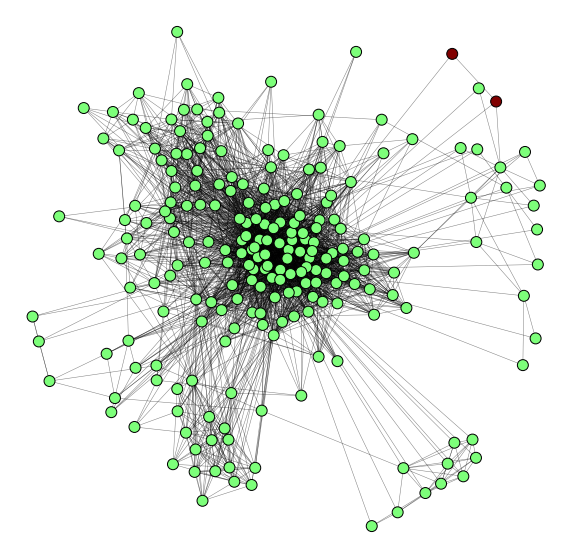

Modularity of community partitions:  2 
 0.0005844088844890363 

community count:  2


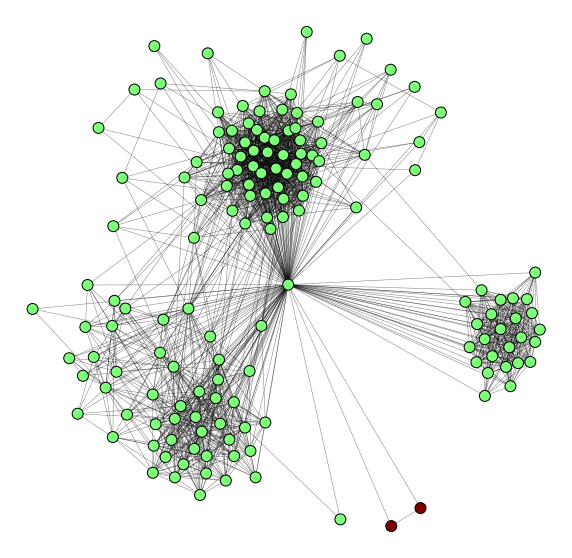

Modularity of community partitions:  3 
 0.001082831932295615 

community count:  2


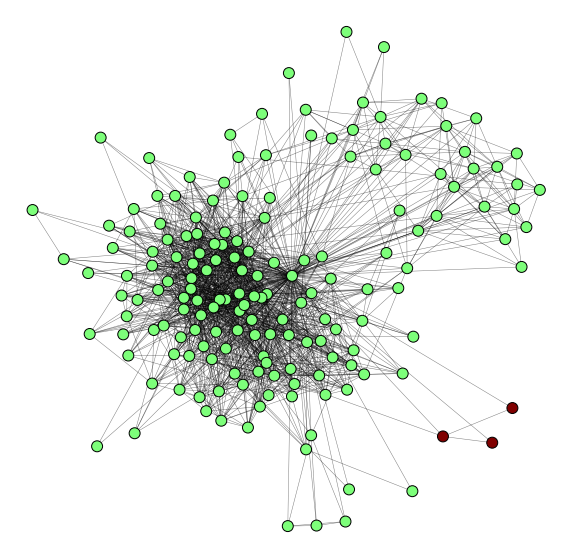

Modularity of community partitions:  4 
 0.002183364112034525 

community count:  2


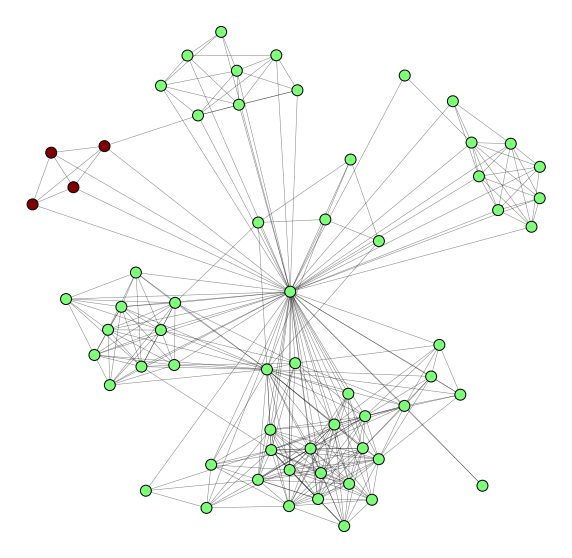

Modularity of community partitions:  5 
 0.034934876461514636 

community count:  2


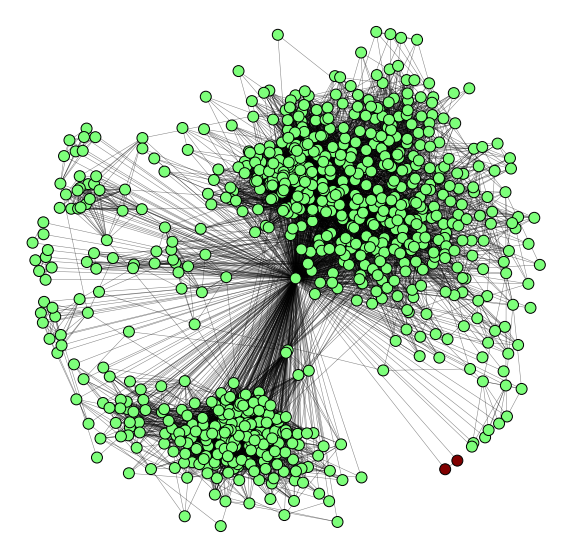

Modularity of community partitions:  6 
 0.00013500741556005965 

community count:  2


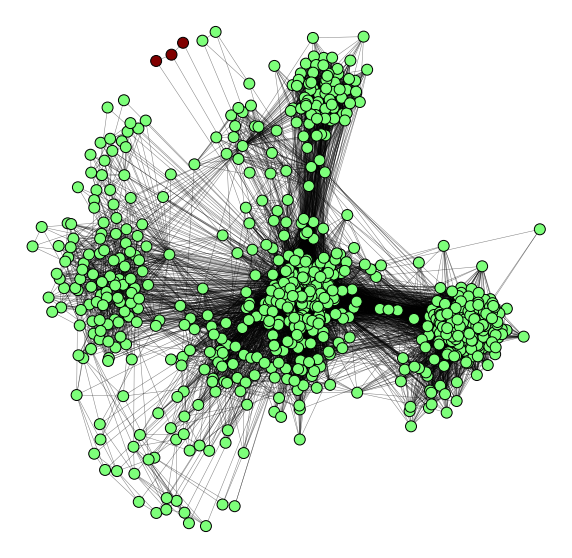

Modularity of community partitions:  7 
 0.00012996242758524278 

community count:  2


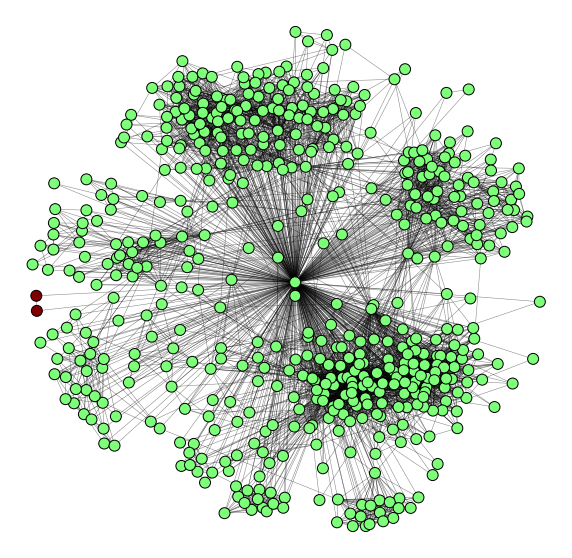

Modularity of community partitions:  8 
 0.0003737617044931936 

community count:  2


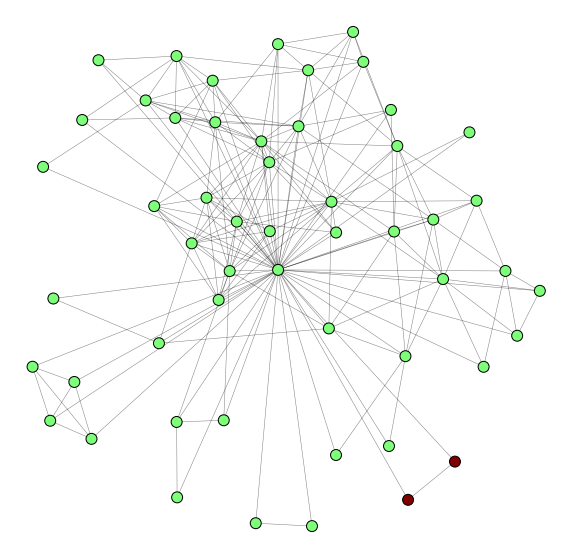

Modularity of community partitions:  9 
 0.00989694929088863 



In [6]:
# Community detection for each ego network using Girvan Newman algorithm with no 

communities = []
modularity = []

for i, graph in enumerate(ego_graphs):

    girvan_communities = algorithms.girvan_newman(graph)
    communities_list = list(sorted(c) for c in next(girvan_communities))
    pos = nx.spring_layout(graph)
    plt_g.plot_girvan_communities(graph,pos,communities_list,10,'ego_'+str(egoNodes[i])+'comm'+ str(i))
    modul = nx_com.modularity(graph,communities_list)
    print("Modularity of community partitions: ",i,'\n',modul,'\n')
    communities.append(communities_list)
    modularity.append(modul)
    


In [0]:
clustering_coffe = []
density_par = []
separ = []

Evaluating Girvan Newman communities without ground truth table.
Evaluation metrics : Modularity, Separability, Cluster Coefficient, Density of the formed communities

Name: 
Type: Graph
Number of nodes: 58
Number of edges: 319
Average degree:  11.0000



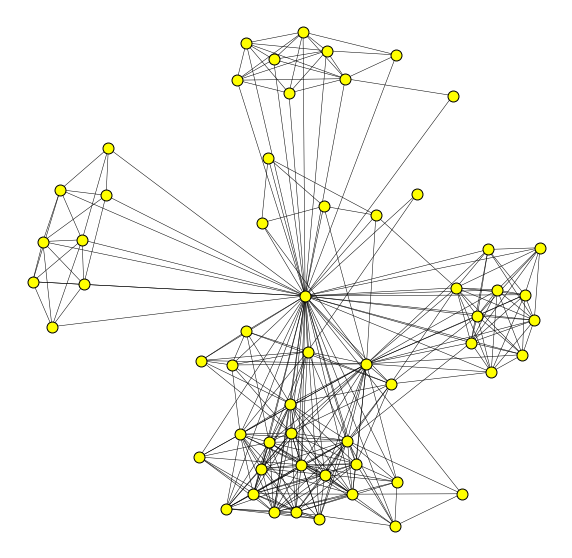

Clustering coefficent : 0.8027965605255928 

Density:  0.19298245614035087 

Separability:  0.05939303667845839 



In [32]:
comm_graph, comm_edges = read_ego.read_communities_detected(communities[5][0],total_edges[5],egoNodes[5])

# Clustering coefficient

cluster_cof = nx.average_clustering(comm_graph)
print("Clustering coefficent :",cluster_cof,'\n')
clustering_coffe.append(cluster_cof)

# Density

density = nx.density(comm_graph) 
print("Density: ",density,'\n')
density_par.append(density)

# Separability

internal_edges = len(comm_edges)
external_edges = len(list(set(total_edges[0]) - set(comm_edges)))
separability = internal_edges / external_edges
print("Separability: ",separability,'\n')
separ.append(separability)

Evaluate Girvan newman communities using grouth truth tbale : circles files w.r.t loss function

In [33]:
predict_circles = communities
true_circles = read_ego.read_circles(egoNodes,path)
cost = [] 

total_loss = 0

for i, ego in enumerate(egoNodes):
    
    loss = algorithms.compute_lossfunction(true_circles[i], predict_circles[i])
    cost.append(loss)
    total_loss += loss

    print("Cost required to update predicted communities w.r.t true circles for ego network : ",i,loss,'\n')
    
print("Total cost required to update predicted communities w.r.t true circles for all ego networks : ",total_loss,'\n')
print("Average cost required to update predicted communities w.r.t true circles for all ego networks : ",(total_loss/len(egoNodes)),'\n')

Cost required to update predicted communities w.r.t true circles for ego network :  0 661.0 

Cost required to update predicted communities w.r.t true circles for ego network :  1 1530.0 

Cost required to update predicted communities w.r.t true circles for ego network :  2 601.0 

Cost required to update predicted communities w.r.t true circles for ego network :  3 323.0 

Cost required to update predicted communities w.r.t true circles for ego network :  4 534.0 

Cost required to update predicted communities w.r.t true circles for ego network :  5 155.0 

Cost required to update predicted communities w.r.t true circles for ego network :  6 1452.0 

Cost required to update predicted communities w.r.t true circles for ego network :  7 1915.0 

Cost required to update predicted communities w.r.t true circles for ego network :  8 769.0 

Cost required to update predicted communities w.r.t true circles for ego network :  9 133.0 

Total cost required to update predicted communities w.r.t

Detect Communities uisng Girvan newman with K cluster 

In [0]:
communities_k5 = []
modularity_k5 = []
k = 5

community count:  6


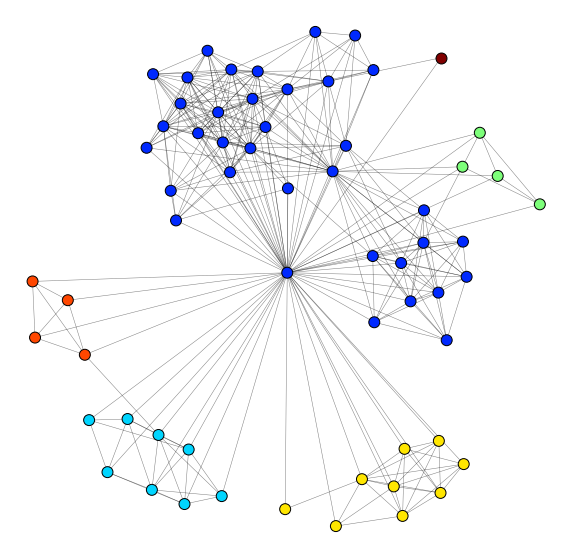

Modularity of community partitions:  698 
 0.2700778561714466 



In [43]:
# Community detection for K = 5 clusters on Ego Network 698

communities_list_k5 = []

girvan_communities = algorithms.girvan_newman(ego_graphs[5])
for comm in itertools.islice(girvan_communities, k):
    communities_list_k5.append((sorted(c) for c in comm))

community_list_k5 = list(communities_list_k5[-1])
pos = nx.spring_layout(ego_graphs[5])
plt_g.plot_girvan_communities(ego_graphs[5],pos,community_list_k5,10,'ego_'+str(egoNodes[5])+'comm_k5')

modul = nx_com.modularity(ego_graphs[5],community_list_k5)
print("Modularity of community partitions: ",str(egoNodes[5]),'\n',modul,'\n')

communities_k5.append(community_list_k5)
modularity_k5.append(modul)

Evaluating Girvan Newman communities without ground truth table. Evaluation metrics : Modularity, Separability, Cluster Coefficient, Density of the formed communities

In [0]:
clustering_coffe_k5 = []
density_par_k5 = []
separ_k5 = []

Name: 
Type: Graph
Number of nodes: 36
Number of edges: 244
Average degree:  13.5556



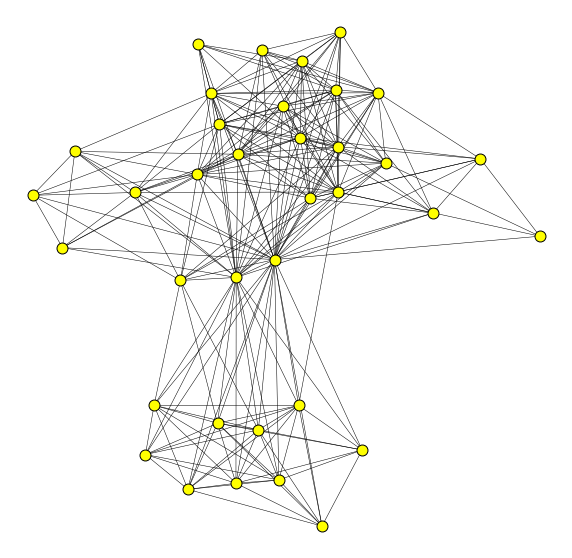

Clustering coefficent : 0.7836577467016925 

Density:  0.3873015873015873 

Separability:  0.6834733893557423 



In [57]:
comm_graph_k5, comm_edges_k5 = read_ego.read_communities_detected(communities_k5[4][0],total_edges[5],egoNodes[5])

# Clustering coefficient

cluster_cof_k5 = nx.average_clustering(comm_graph_k5)
print("Clustering coefficent :",cluster_cof_k5,'\n')
clustering_coffe_k5.append(cluster_cof_k5)

# Density

density_k5 = nx.density(comm_graph_k5) 
print("Density: ",density_k5,'\n')
density_par_k5.append(density_k5)


# Separability

internal_edges_k5 = len(comm_edges_k5)
external_edges_k5 = len(list(set(total_edges[5]) - set(comm_edges_k5)))
separability_k5 = internal_edges_k5 / external_edges_k5
print("Separability: ",separability_k5,'\n')
separ_k5.append(separability_k5)



Evaluate Girvan newman communities using grouth truth tbale : circles files w.r.t loss function

In [92]:
predict_circles_k5 = communities_k5
true_circles_k5 = read_ego.read_circles(egoNodes,path)

unwanted = [1,6,7,8]
item_list = [val for i , val in enumerate(true_circles_k5) if i not in unwanted]
true_circles_k5 = item_list
  
cost_k5 = []

total_loss_k5 = 0

for i in range(0,6):
    
    loss_k5 = algorithms.compute_lossfunction(true_circles_k5[i], predict_circles_k5[i])
    cost_k5.append(loss_k5)
    total_loss_k5 += loss_k5

    print("Cost required to update predicted communities w.r.t true circles for ego network : ",i,loss_k5,'\n')
    
print("Total cost required to update predicted communities w.r.t true circles for all ego networks : ",total_loss_k5,'\n')
print("Average cost required to update predicted communities w.r.t true circles for all ego networks : ",(total_loss_k5/len(egoNodes)),'\n')

Cost required to update predicted communities w.r.t true circles for ego network :  0 655.0 

Cost required to update predicted communities w.r.t true circles for ego network :  1 592.0 

Cost required to update predicted communities w.r.t true circles for ego network :  2 311.0 

Cost required to update predicted communities w.r.t true circles for ego network :  3 485.0 

Cost required to update predicted communities w.r.t true circles for ego network :  4 128.0 

Cost required to update predicted communities w.r.t true circles for ego network :  5 121.0 

Total cost required to update predicted communities w.r.t true circles for all ego networks :  2292.0 

Average cost required to update predicted communities w.r.t true circles for all ego networks :  229.2 



Detect Communities uisng Louvian Algorithm 

Found community count:  9.0


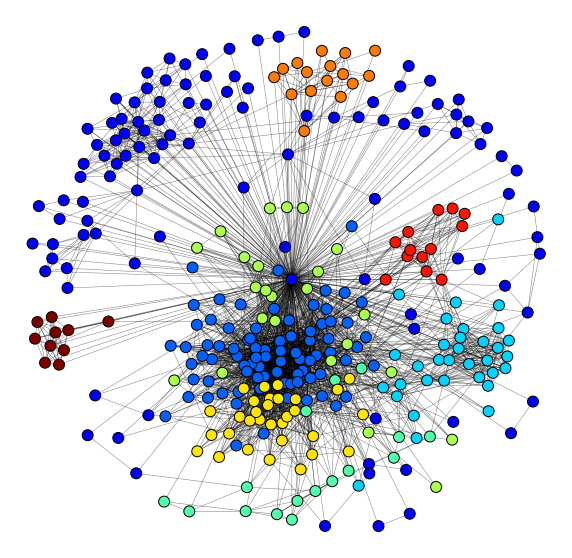

Modularity of community partitions:  0 
 0.4308935782866382 

Modified Dictionary defaultdict(<class 'list'>, {0: [0, 117, 23, 116, 288, 270, 76, 28, 312, 214, 20, 307, 71, 333, 283, 144, 226, 149, 17, 326, 255, 49, 140, 137, 343, 115, 111, 14, 310, 32, 230, 70, 228, 286, 81, 174, 293, 33, 42, 2, 279, 162, 19, 192, 243, 8, 245, 173, 259, 167, 91, 61, 93, 41, 6, 89, 301, 337, 110, 264, 201, 289, 262, 220, 234, 44, 193, 97, 124, 112, 90, 179, 216, 151, 145, 157, 327, 95, 120, 247, 190, 282, 244, 319, 233, 256, 166, 202, 155, 147, 229, 138, 240, 77, 219, 305, 153, 154, 198, 182, 241, 294, 253, 267, 205, 47, 183, 52, 34], 1: [236, 186, 122, 285, 271, 304, 176, 9, 252, 332, 276, 26, 280, 272, 133, 62, 239, 322, 3, 170, 56, 188, 315, 323, 200, 344, 67, 277, 134, 274, 21, 169, 207, 341, 334, 141, 345, 158, 109, 291, 142, 105, 232, 248, 224, 290, 25, 161, 66, 85, 123, 297, 185, 104, 30, 72, 40, 212, 39, 10, 55, 69, 113, 258, 257, 156, 303, 75, 318, 165, 121, 60, 45, 96, 235, 79, 208, 132, 221,

<Figure size 432x288 with 0 Axes>

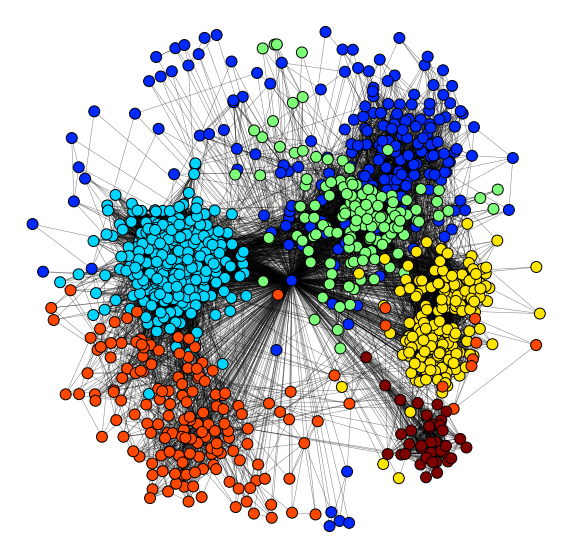

Modularity of community partitions:  1 
 0.5278510076127716 

Modified Dictionary defaultdict(<class 'list'>, {0: [107, 1200, 1202, 1412, 1366, 1472, 1355, 1236, 944, 1428, 1569, 1444, 1876, 1703, 1686, 924, 1260, 1473, 1760, 1070, 1436, 1213, 1005, 1139, 914, 1041, 1496, 1228, 1469, 1011, 1072, 1435, 1492, 1348, 1630, 1415, 949, 1815, 968, 1727, 1418, 1167, 1246, 1529, 1536, 1042, 1189, 1296, 1109, 1131, 1304, 1159, 1738, 1338, 1500, 1634, 1310, 1177, 1010, 1504, 1770, 1531, 1709, 1134, 1756, 1225, 1830, 1525, 1889, 1499, 1275, 1482, 1785, 1807, 1051, 1699, 1541, 994, 1394, 1240, 1022, 1000, 1474, 1258, 1226, 1052, 1781, 913, 1121, 1885, 1154, 1650, 1818, 1141, 1062, 1507, 977, 1306, 1624, 1188, 1906, 956, 1308, 1725, 1633, 1035, 1217, 1640, 1748, 1646, 1046, 1586, 1672, 1311, 1259, 1745, 1299, 1093, 1681, 1106, 1127, 1090, 1667, 1546, 1152, 1481, 1268, 1183, 1364, 940, 1170, 964, 1664, 1403, 1089, 1869, 1562, 1343, 1897, 1168, 974, 1244, 1247, 1138, 1276, 965, 1904, 1169, 1218, 1840,

<Figure size 432x288 with 0 Axes>

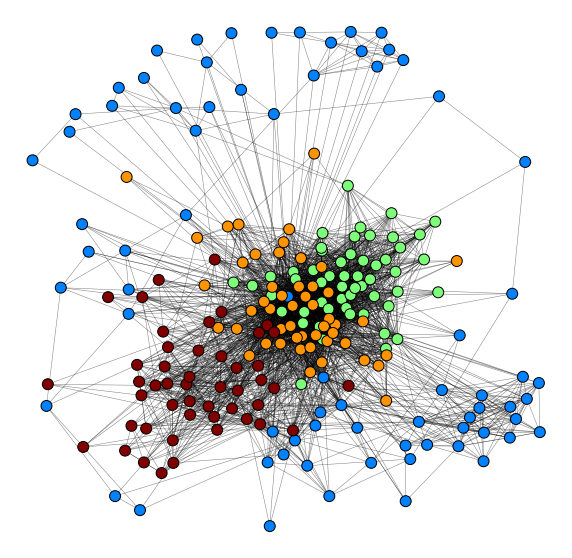

Modularity of community partitions:  2 
 0.2972434102638638 

Modified Dictionary defaultdict(<class 'list'>, {0: [348, 469, 516, 173, 549, 457, 477, 364, 441, 563, 397, 443, 453, 426, 540, 464, 552, 476, 533, 442, 543, 467, 572, 424, 427, 407, 357, 350, 369, 551, 381, 486, 459, 198, 399, 389, 501, 564, 454, 351, 435, 437, 528, 518, 380, 532, 498, 509, 554, 449, 541, 571, 480, 468, 406, 505, 433, 478, 349, 534, 485, 34, 356, 411, 384, 393, 472, 386, 499, 379, 401, 377, 383], 1: [436, 538, 404, 565, 412, 536, 398, 560, 493, 559, 378, 482, 525, 484, 492, 479, 483, 517, 416, 368, 503, 423, 400, 515, 434, 496, 409, 526, 363, 440, 561, 497, 408, 512, 394, 419, 527, 511, 392, 566, 353, 488, 375, 456, 366, 537, 391, 430, 431, 487, 494, 352, 462, 385], 2: [428, 471, 461, 544, 414, 465, 402, 520, 567, 542, 506, 514, 545, 373, 460, 395, 370, 524, 451, 371, 420, 432, 448, 508, 444, 523, 365, 507, 439, 513, 387, 413, 495, 553, 556, 558, 445, 417, 374, 388, 438, 425, 360, 421, 473, 569, 570, 362, 4

<Figure size 432x288 with 0 Axes>

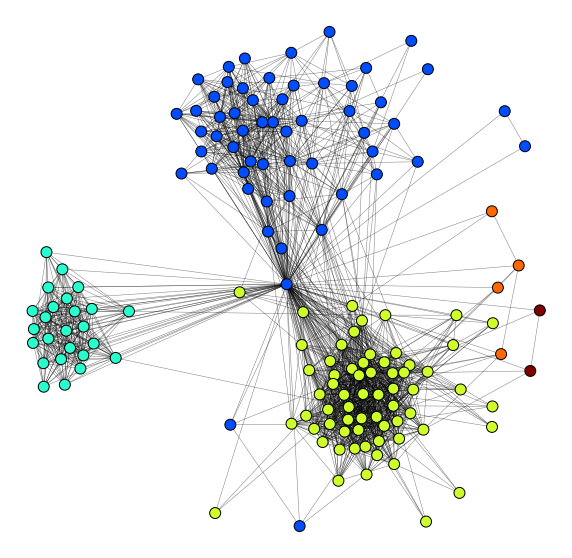

Modularity of community partitions:  3 
 0.5085593183163758 

Modified Dictionary defaultdict(<class 'list'>, {0: [414, 636, 630, 597, 619, 664, 666, 633, 680, 609, 579, 663, 596, 684, 422, 589, 685, 575, 623, 625, 654, 611, 612, 644, 588, 617, 678, 592, 603, 620, 480, 590, 618, 672, 573, 605, 653, 655, 626, 677, 616, 584, 598, 622, 631, 682, 593, 639, 657, 621, 574, 660, 648, 679, 642, 581], 1: [650, 647, 665, 583, 632, 643, 681, 577, 578, 635, 627, 600, 582, 599, 662, 640, 615, 628, 661, 670, 595, 658, 675, 576, 659], 2: [461, 544, 614, 515, 363, 348, 436, 428, 400, 591, 500, 524, 553, 561, 651, 606, 438, 370, 556, 373, 434, 566, 604, 683, 376, 475, 465, 580, 483, 395, 676, 671, 492, 567, 542, 637, 412, 558, 646, 431, 559, 378, 645, 513, 107, 394, 514, 506, 423, 601, 669, 629, 391, 563, 634, 587, 496, 641, 374, 586, 656, 610, 673, 652], 3: [173, 649, 427, 34], 4: [594, 667]})
Each Ego Node community partitions:  [[414, 636, 630, 597, 619, 664, 666, 633, 680, 609, 579, 663, 596, 684, 

<Figure size 432x288 with 0 Axes>

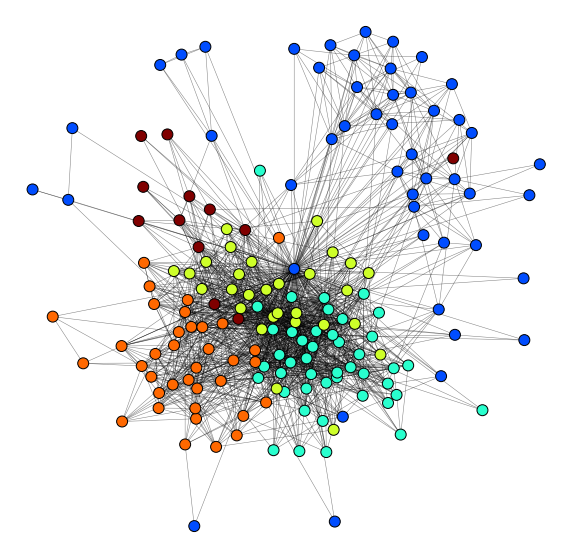

Modularity of community partitions:  4 
 0.3131572034183595 

Modified Dictionary defaultdict(<class 'list'>, {0: [686, 768, 733, 789, 702, 732, 818, 707, 767, 798, 736, 746, 742, 717, 852, 816, 833, 822, 791, 806, 743, 782, 757, 775, 799, 725, 721, 796, 839, 813, 712, 771, 786, 855, 846, 699, 788, 704, 749, 802, 714, 689, 850, 841, 691, 785, 744, 750], 1: [827, 826, 752, 756, 694, 724, 842, 719, 713, 829, 696, 810, 710, 722, 853, 834, 715, 805, 761, 766, 745, 814, 847, 734, 727, 800, 794, 706, 731, 784, 781, 695, 795, 751, 760, 738, 772, 690, 773, 711, 762, 700, 854, 851], 2: [819, 830, 828, 821, 701, 697, 840, 823, 835, 779, 688, 844, 792, 778, 848, 726, 723, 838, 754, 824, 737, 845, 837, 780, 815, 812, 693, 777, 709], 3: [728, 764, 783, 831, 820, 849, 803, 747, 739, 787, 748, 755, 809, 703, 759, 705, 718, 797, 687, 720, 807, 793, 758, 843, 741, 770, 790, 730, 716, 836, 763, 817, 765, 808, 832, 740], 4: [708, 774, 698, 769, 856, 811, 735, 776, 753, 729, 804, 825]})
Each Ego Node comm

<Figure size 432x288 with 0 Axes>

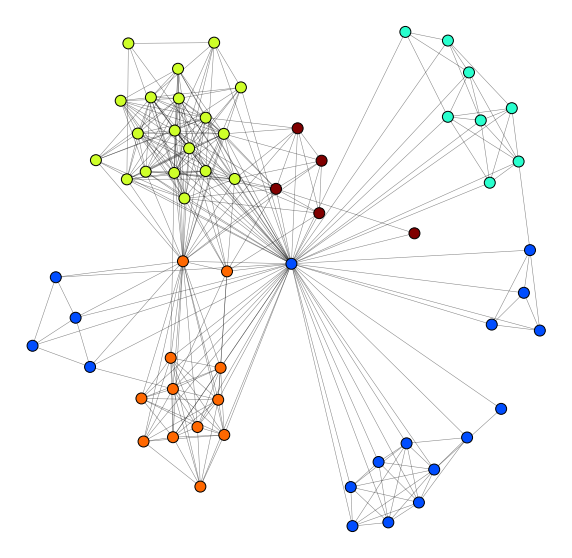

Modularity of community partitions:  5 
 0.4523416179114831 

Modified Dictionary defaultdict(<class 'list'>, {0: [698, 884, 864, 872, 873, 865, 857, 874, 885, 825, 859, 887, 776, 893, 867, 868, 877, 862], 1: [881, 858, 870, 871, 895, 879, 894, 866], 2: [828, 697, 719, 713, 840, 803, 745, 805, 708, 823, 774, 800, 819, 810, 830, 747, 772, 880, 703], 3: [856, 889, 861, 863, 888, 729, 876, 753, 804, 886, 878, 882], 4: [869, 769, 890, 811, 798]})
Each Ego Node community partitions:  [[698, 884, 864, 872, 873, 865, 857, 874, 885, 825, 859, 887, 776, 893, 867, 868, 877, 862], [881, 858, 870, 871, 895, 879, 894, 866], [828, 697, 719, 713, 840, 803, 745, 805, 708, 823, 774, 800, 819, 810, 830, 747, 772, 880, 703], [856, 889, 861, 863, 888, 729, 876, 753, 804, 886, 878, 882], [869, 769, 890, 811, 798]] 

Validate partions:  5 

Found community count:  7.0


<Figure size 432x288 with 0 Axes>

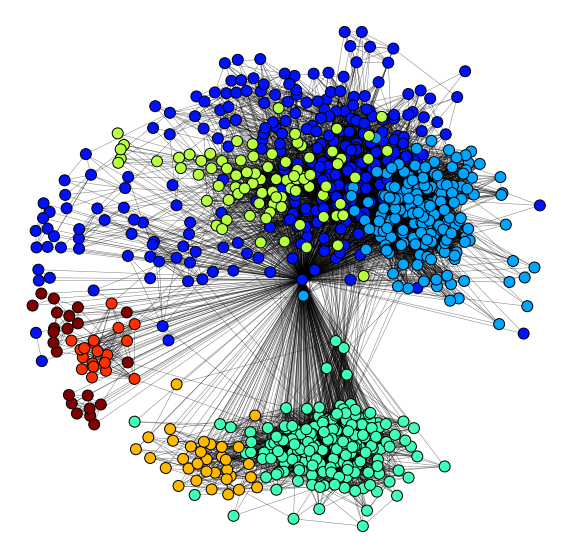

Modularity of community partitions:  6 
 0.5571918986432238 

Modified Dictionary defaultdict(<class 'list'>, {0: [1684, 2818, 2725, 2832, 3087, 3236, 3327, 2675, 2787, 3214, 2893, 2771, 3050, 2667, 3173, 2878, 3249, 2801, 3256, 3124, 2803, 2730, 3307, 2847, 3361, 2764, 3248, 2856, 3156, 2843, 3263, 3057, 3385, 2795, 2690, 2844, 2718, 3136, 3178, 3208, 2665, 2886, 2999, 2783, 2734, 3043, 2871, 3425, 3402, 3107, 3343, 3253, 2688, 3374, 2964, 2715, 2865, 3215, 2968, 3167, 2918, 3074, 3127, 3289, 2955, 2813, 3380, 2772, 3328, 3144, 3369, 3219, 3259, 3189, 3075, 2921, 2702, 3099, 3242, 3138, 2923, 2677, 3278, 1534, 2938, 2760, 2790, 2883, 2831, 3326, 2996, 3341, 2997, 2933, 1758, 2758, 2700, 3266, 3398, 3222, 3192, 3313, 3032, 3337, 1450, 3312, 1642, 2848, 3365, 2819, 3418, 3027, 3171, 2841, 2816, 2735, 2709, 1505, 3245, 1666, 3164, 3151, 3421, 3093, 107, 1726, 3393, 2932, 3255, 3034, 3323, 3264, 3196, 3097, 2941, 3072, 3254, 990, 2685, 2668, 2723, 2836, 2686, 3405, 3187, 3081, 3165, 2768,

<Figure size 432x288 with 0 Axes>

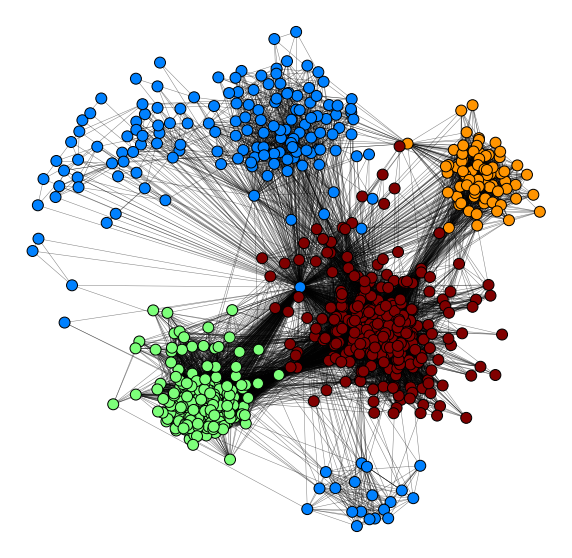

Modularity of community partitions:  7 
 0.5226854862131042 

Modified Dictionary defaultdict(<class 'list'>, {0: [1912, 2650, 2207, 2228, 2082, 2126, 2317, 2412, 2371, 2166, 2357, 2152, 2558, 2375, 2360, 2156, 2397, 1978, 2523, 2158, 2570, 2335, 1960, 2535, 2361, 2503, 2114, 2260, 2120, 2105, 2487, 2245, 1988, 2466, 2197, 2236, 2322, 2644, 1922, 2341, 2628, 1975, 1930, 1934, 2349, 2424, 2313, 1965, 2587, 2170, 2486, 2513, 2041, 2456, 2401, 2540, 2474, 2411, 2314, 2618, 1933, 2403, 2444, 2119, 2316, 2178, 2035, 2049, 2146, 1990, 2450, 2320, 1992, 2405, 2162, 2402, 2238, 2089, 2231, 2076, 2455, 2534, 2130, 2107, 2621, 2091, 1937, 2632, 2528, 2439, 2448, 2181, 2217, 2497, 2017, 2321, 2562, 2106, 2421, 2440, 2129, 2099, 2160, 2251, 2286, 2577, 1936, 2490, 2248, 2342, 1949, 1956, 2281, 2070, 2080, 2167, 2426, 2255, 2622, 2008, 2173, 1915, 2614, 2023, 2193, 2422, 2441, 1961, 2094, 2656, 2100, 2277, 2580, 2380, 2301, 2175, 2481, 2515, 2488, 2015, 2051, 2230, 2034, 2527, 2227, 2113, 1996, 254

<Figure size 432x288 with 0 Axes>

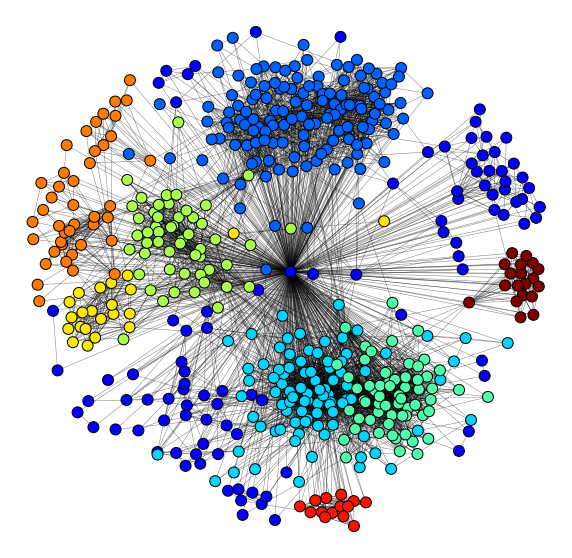

Modularity of community partitions:  8 
 0.6209426035143463 

Modified Dictionary defaultdict(<class 'list'>, {0: [3437, 3549, 3905, 3953, 3775, 3813, 3610, 3847, 3950, 3669, 3502, 3522, 3544, 3592, 3490, 3546, 3861, 3954, 3916, 3624, 3745, 3949, 3805, 3812, 3801, 3885, 3679, 3894, 3504, 3487, 3660, 3888, 3530, 3551, 3779, 3659, 3863, 3682, 3652, 3676, 3662, 3872, 3811, 3626, 3727, 3772, 3446, 3979, 3441, 3536, 3771, 3911, 3864, 3700, 3925, 3814, 3688, 3531, 3723, 3489, 3665, 3742, 3849, 3560, 3691, 3580, 3585, 3565, 3955, 3959, 3963, 3566, 3904, 3922, 3928, 3961, 3744, 567, 3806, 3447, 3694, 3444, 3733, 3704, 3746, 3846, 3717, 3575, 3839, 3606, 3673, 3816, 3939, 3732, 3637, 3477, 3808, 3589], 1: [3825, 3568, 3726, 3972, 3623, 3866, 3793, 3951, 3826, 3869, 3782, 3558, 3620, 3792, 3924, 3969, 3493, 3612, 3937, 3463, 3909, 3510, 3915, 3764, 3758, 3822, 3833, 3529, 3895, 3464, 3718, 3584, 3843, 3719, 3511, 3486, 3706, 3931, 3958, 3468, 3534, 3668, 3466, 3474, 3945, 3711, 3794, 3947, 3896,

<Figure size 432x288 with 0 Axes>

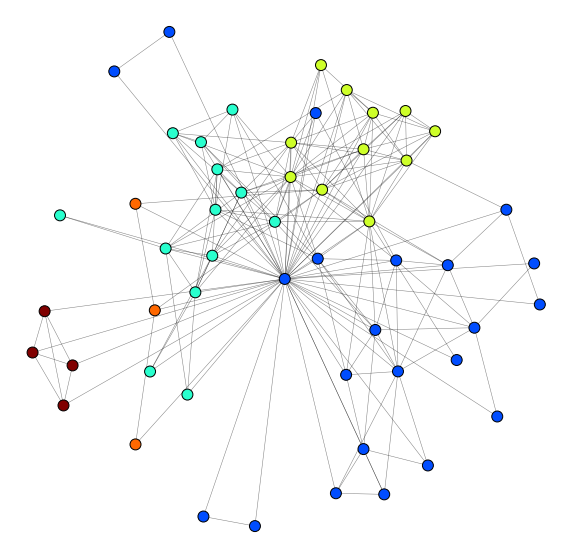

Modularity of community partitions:  9 
 0.35182634425058673 

Modified Dictionary defaultdict(<class 'list'>, {0: [3980, 4038, 4032, 4027, 4031, 4013, 4004, 4002, 4037, 4020, 3991, 3989, 4011, 594, 3996, 4029, 4001, 4034, 4028, 4012, 3987, 4006], 1: [4014, 4026, 4021, 3988, 3995, 3993, 3986, 4017, 3983, 3992, 4000, 3985, 4033], 2: [4019, 4023, 4003, 4018, 3997, 3998, 4030, 3982, 3994, 4009, 3981], 3: [3999, 4005, 4036], 4: [4025, 4016, 3990, 4007]})
Each Ego Node community partitions:  [[3980, 4038, 4032, 4027, 4031, 4013, 4004, 4002, 4037, 4020, 3991, 3989, 4011, 594, 3996, 4029, 4001, 4034, 4028, 4012, 3987, 4006], [4014, 4026, 4021, 3988, 3995, 3993, 3986, 4017, 3983, 3992, 4000, 3985, 4033], [4019, 4023, 4003, 4018, 3997, 3998, 4030, 3982, 3994, 4009, 3981], [3999, 4005, 4036], [4025, 4016, 3990, 4007]] 

Validate partions:  5 

Final List of Communities of all Ego nodes:  [[[0, 117, 23, 116, 288, 270, 76, 28, 312, 214, 20, 307, 71, 333, 283, 144, 226, 149, 17, 326, 255, 49, 140, 

<Figure size 432x288 with 0 Axes>

In [61]:
# Community detection for each ego network using Louvain  algorithm
from collections import defaultdict
communities_L = []
modularity_L = []

for i, graph in enumerate(ego_graphs):

    Louvain_communities =  community.best_partition(graph)
    pos = nx.spring_layout(graph)
    plt_g.plot_bestpartition_communities(graph, pos, Louvain_communities, 10, 'ego_'+str(egoNodes[i])+'L_comm')

    modul = community.modularity(Louvain_communities,graph)
    print("Modularity of community partitions: ",i,'\n',modul,'\n')

    
    modularity_L.append(modul)
    
    
    dictaNew = defaultdict(list)

    for key,val in Louvain_communities.items():
        if val in dictaNew.keys():
            dictaNew[val].append(key)
        else:
            dictaNew[val]= [key]

    print("Modified Dictionary",dictaNew)


    communities_Louvain = []
    for key,value in dictaNew.items():
      communities_Louvain.append(value)
    print("Each Ego Node community partitions: ",communities_Louvain,'\n')
    print("Validate partions: ",len(communities_Louvain),'\n')

    communities_L.append(communities_Louvain)

print("Final List of Communities of all Ego nodes: ",communities_L,'\n')
print("length of final list: ",len(communities_L))

Evaluating Louvian communities without ground truth table. Evaluation metrics : Modularity, Separability, Cluster Coefficient, Density of the formed communities

In [0]:
clustering_coffe_L = []
density_par_L = []
separ_L = []

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 52
Average degree:   5.7778



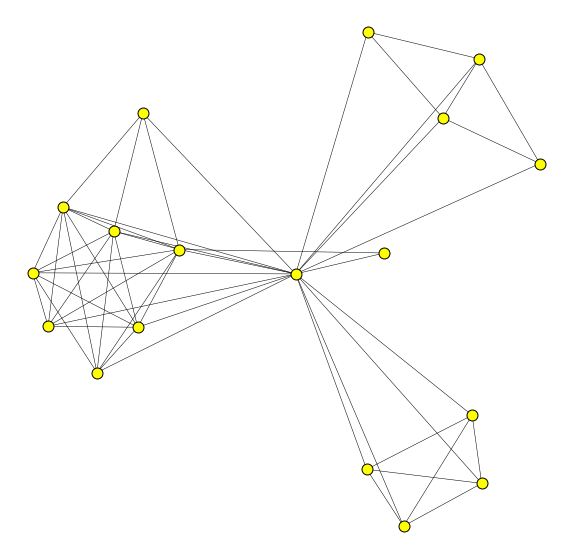

Clustering coefficent : 0.8965725178960473 

Density:  0.3873015873015873 

Separability:  0.0947176684881603 



In [79]:

comm_graph_L, comm_edges_L = read_ego.read_communities_detected(communities_L[5][0],total_edges[5],egoNodes[5])

# Clustering coefficient

cluster_cof_L = nx.average_clustering(comm_graph_L)
print("Clustering coefficent :",cluster_cof_L,'\n')
# clustering_coffe_L.append(cluster_cof_L)


# Density

density_L = nx.density(comm_graph_L) 
print("Density: ",density_k5,'\n')
# density_par_L.append(density_L)

# Separability

internal_edges_L = len(comm_edges_L)
external_edges_L = len(list(set(total_edges[5]) - set(comm_edges_L)))
separability_L = internal_edges_L / external_edges_L
print("Separability: ",separability_L,'\n')
# separ_L.append(separability_L)


Evaluate Louvian communities using grouth truth tbale : circles files w.r.t loss function

In [80]:
predict_circles_L = communities_L
true_circles_L = read_ego.read_circles(egoNodes,path)

cost_L = []

total_loss_L = 0


for i, ego in enumerate(egoNodes):
    
    loss_L = algorithms.compute_lossfunction(true_circles_L[i], predict_circles_L[i])
    cost_L.append(loss_L)
    total_loss_L += loss_L

    print("Cost required to update predicted communities w.r.t true circles for ego network : ",i,loss_L,'\n')
    
print("Total cost required to update predicted communities w.r.t true circles for all ego networks : ",total_loss_L,'\n')
print("Average cost required to update predicted communities w.r.t true circles for all ego networks : ",(total_loss_L/len(egoNodes)),'\n')

Cost required to update predicted communities w.r.t true circles for ego network :  0 773.0 

Cost required to update predicted communities w.r.t true circles for ego network :  1 1484.0 

Cost required to update predicted communities w.r.t true circles for ego network :  2 1030.0 

Cost required to update predicted communities w.r.t true circles for ego network :  3 231.0 

Cost required to update predicted communities w.r.t true circles for ego network :  4 663.0 

Cost required to update predicted communities w.r.t true circles for ego network :  5 143.0 

Cost required to update predicted communities w.r.t true circles for ego network :  6 1585.0 

Cost required to update predicted communities w.r.t true circles for ego network :  7 10745.0 

Cost required to update predicted communities w.r.t true circles for ego network :  8 1130.0 

Cost required to update predicted communities w.r.t true circles for ego network :  9 137.0 

Total cost required to update predicted communities w.

Plot Evaluation metrics without ground truth table : plot Cluster coffiecient, Density, Separability to evaluate and compare cluster formed using Girvan Newman and Louvian algorithms 

In [0]:
# For Ego Node 698 plot cluster partion evaluation metrics:
clustercof_list = []
desnsity_list = []
separability_list = []
cost_list = []

clustercof_list.append(clustering_coffe)
clustercof_list.append(clustering_coffe_k5)
clustercof_list.append(clustering_coffe_L)

desnsity_list.append(density_par)
desnsity_list.append(density_par_k5)
desnsity_list.append(density_par_L)

separability_list.append(separ)
separability_list.append(separ_k5)
separability_list.append(separ_L)

cost_list.append(cost)
cost_list.append(cost_k5)
cost_list.append(cost_L)

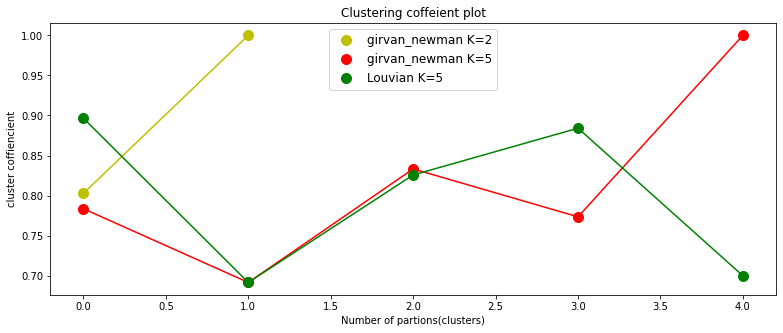

In [142]:
plt_g.plot_eval_metrics('Clustering coffeient plot','Number of partions(clusters)','cluster coffiencient',clustercof_list,"girvan_newman K=2","girvan_newman K=5","Louvian K=5")

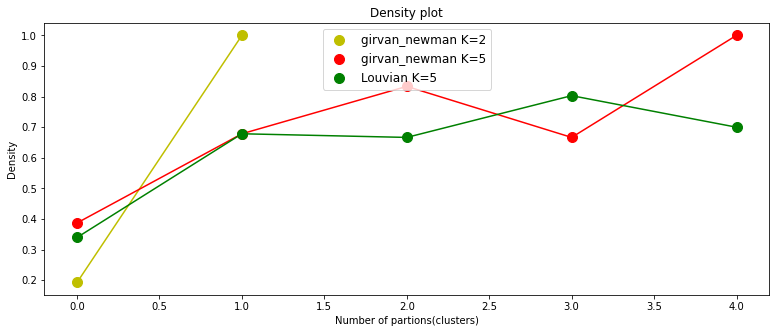

In [143]:
plt_g.plot_eval_metrics('Density plot','Number of partions(clusters)','Density',desnsity_list,"girvan_newman K=2","girvan_newman K=5","Louvian K=5")

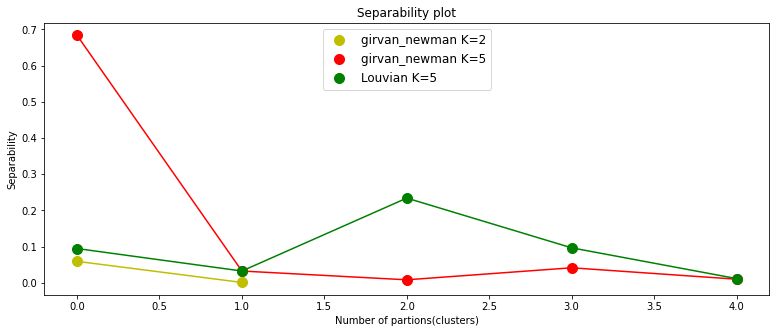

In [144]:
plt_g.plot_eval_metrics('Separability plot','Number of partions(clusters)','Separability',separability_list,"girvan_newman K=2","girvan_newman K=5","Louvian K=5")

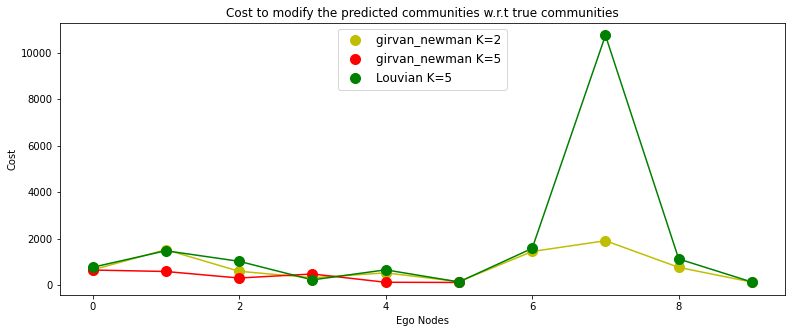

In [147]:
plot_eval_metrics('Cost to modify the predicted communities w.r.t true communities','Ego Nodes','Cost',cost_list,"girvan_newman K=2","girvan_newman K=5","Louvian K=5")